In [1]:
from dataset import GF5BP
path = "D:\\Datasets\\GID15\\Train"
dataset = GF5BP(path)
w = dataset.get_class_weights(distribution=True)

In [3]:
w = w.tolist()

In [32]:
index_to_label = {
    0:"unlabeled",
    1:"industrial area",
    2:"paddy field",
    3:"irrigated field",
    4:"dry cropland",
    5:"garden land",
    6:"arbor forest",
    7:"shrub forest",
    8:"park",
    9:"natural meadow",
    10:"artificial meadow",
    11:"river",
    12:"urban residential",
    13:"lake",
    14:"pond",
    15:"fish pond",
    16:"snow",
    17:"bareland",
    18:"rural residential",
    19:"stadium",
    20:"square",
    21:"road",
    22:"overpass",
    23:"railway station",
    24:"airport",
}
label_to_index = {
    "unlabeled":0,
    "industrial area":1,
    "paddy field":2,
    "irrigated field":3,
    "dry cropland":4,
    "garden land":5,
    "arbor forest":6,
    "shrub forest":7,
    "park":8,
    "natural meadow":9,
    "artificial meadow":10,
    "river":11,
    "urban residential":12,
    "lake":13,
    "pond":14,
    "fish pond":15,
    "snow":16,
    "bareland":17,
    "rural residential":18,
    "stadium":19,
    "square":20,
    "road":21,
    "overpass":22,
    "railway station":23,
    "airport":24,
}

In [63]:
groups = {
    "building (airport,railway,overpass,square,stadium)": [24, 23, 22, 20, 19],
    "residential(urban,rural)": [12, 18],
    "lake (lake,pond,fish pond)": [13,14,15],
    "bareland (snow,bareland)": [16,17],
    "meadow (artificial,natural,park,garden land)": [5,8,9,10],
    "forest (arbor,shrub)":[6,7]
}

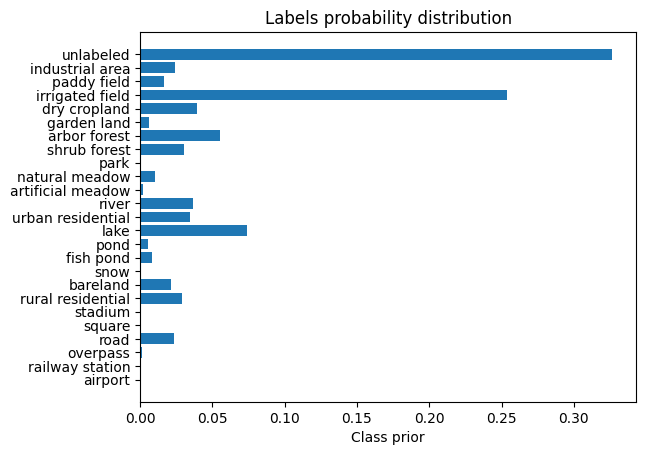

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

def plot(probs):
    fig, ax = plt.subplots()
    #sw = sorted(w, reverse=True)
    # Example data
    y_pos = np.arange(len(probs))
    ax.barh(y_pos, probs.values(), align='center')
    ax.set_yticks(y_pos, labels=probs.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Class prior')
    ax.set_title('Labels probability distribution')

    plt.show()
gaofen_probs = {index_to_label[i]:x for i,x in enumerate(w)}
plot(gaofen_probs)

In [65]:
dep_classes = []
for key,value in groups.items():
    dep_classes += value
dep_classes
vals = {}
for key,value in groups.items():
    vals[key] = sum(w[x] for x in value)
print(vals)


{'building (airport,railway,overpass,square,stadium)': 0.002813990242430009, 'residential(urban,rural)': 0.06336968578398228, 'lake (lake,pond,fish pond)': 0.08807837963104248, 'bareland (snow,bareland)': 0.021924533240962774, 'meadow (artificial,natural,park,garden land)': 0.018479493650374934, 'forest (arbor,shrub)': 0.08537350967526436}


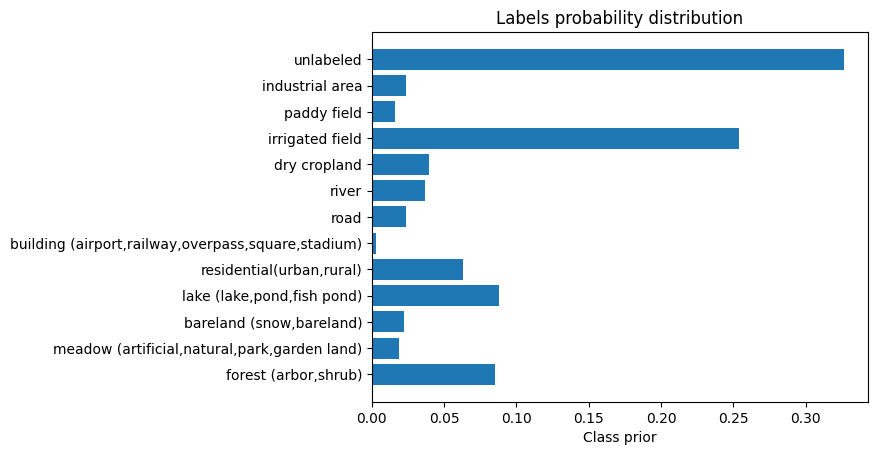

In [66]:
new = {index_to_label[i]:x for i,x in enumerate(w) if i not in dep_classes}
new.update(vals)
plot(new)